# ABOUT


Datascientest's Datascientist continuous bootcamp - cohorte Mars2022 -  AeroBOT project

**Tutor**

* Alban THUET

**Authors:**

* Hichem HADJI  

</br>

---
</br>

**Version History**

Version | Date       | Author(s)  | Modification
--------|----------- | ---------  | --------------------------
1.0     | 20/06/2022 | H.H.       | Document creation

This notebook can be executed entirely. 

It

* mounts the GDrive of our AeroBot project @gmail account.

* loads the data from the `train_data_final.pkl` file (cf. `0_test_set_creator_DO_NOT_MODIFY_20220630.ipynb`) under a pandas DataFrame named `df`, which contains `97417` entries and 96 columns.
These data do not contain any more UAS-related entries.

* Loads the raw and pre-processed Narrative data once tokenized and stemmed ("Narrative_Raw_Stemmed_24072022_TRAIN.pkl" and "Narrative_PP_stemmed_24072022_TRAIN.pkl") (cf 03_Narr_Next preprocessing 20220721.ipynb)

* Performs Feature Engineering: one-hot-encoding of Anomaly using a naive approache, looking directly for the root label into the multiple modalities string of Anomaly

Further processing of the data should be perfomed on this dataframe, after having **copied a version of the present notebook**.

# IMPORT PACKAGES


settings for  full / patial Narrative display. Helene?


In [1]:
#######################
# Import packages
#######################
import numpy as np
import seaborn as sns
import math # for math.pi etc.
import time # time code execution

#######################
# Pandas
#######################
import pandas as pd
# Set pandas settings to show all data when using .head(), .columns etc.
pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.set_option("display.colheader_justify","left") # left-justify the print output of pandas

### Display full columnwidth
# Set pandas settings to display full text columns
#pd.options.display.max_colwidth = None
# Restore pandas settings to display standard colwidth
pd.reset_option('display.max_colwidth')

import itertools # Pour créer des iterateurs

# Package to show the progression of pandas operations
from tqdm import tqdm
# from tqdm.auto import tqdm  # for notebooks

# Create new `pandas` methods which use `tqdm` progress
# (can use tqdm_gui, optional kwargs, etc.)
tqdm.pandas()
# simply use .progress_apply() instead of .apply() on your pd.DataFram

######################
# PLOTTING
######################
import matplotlib.pyplot as plt
%matplotlib inline
# # Define global plot parameters for better readability and consistency among plots
# # A complete list of the rcParams keys can be retrieved via plt.rcParams.keys() function
# plt.rcParams['axes.titlesize'] = 30
# plt.rcParams['axes.labelsize'] = 23
# plt.rcParams['xtick.labelsize'] = 23
# plt.rcParams['ytick.labelsize'] = 23
# plt.rc('legend', fontsize=23)    # legend fontsize

# BOKEH 
from bokeh.plotting import figure # Importation de la classe figure qui permet de créer un graphique bokeh.
from bokeh.io import  push_notebook, output_notebook, show
output_notebook() # permet d'afficher tous les futurs graphiques dans l'output d'une cellule jupyter. Si cette instruction n'est pas lancée, la figure s'affichera dans un nouvel onglet.
from bokeh.models import ColumnDataSource, Label
from bokeh.transform import dodge
from bokeh.models.tools import HoverTool

#####################
# NLP 
#####################
import re # for Regular Expression handling
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet') # WordNet lemmatizer
nltk.download('omw-1.4') # necessary for WordNet lemmatizer
from nltk.tokenize import word_tokenize # Usual tokenizer
from nltk.tokenize import TweetTokenizer # Special tokenizer;  "we'll", "didn't", etc. are considered as one word
from sklearn.feature_extraction.text import CountVectorizer # Vectorization
from nltk.corpus import stopwords # Import stopwords from nltk.corpus
from nltk.stem.snowball import EnglishStemmer
##############################
# Undersampeling
##############################
from imblearn.under_sampling import RandomUnderSampler 
###############################
# ML preprocessing and models
###############################
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import ensemble # random forest
from sklearn.svm import SVC

from sklearn.metrics import classification_report, confusion_matrix


###############################
# Other
###############################
import pickle as pkl # Saving data externally

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


# LOAD DATA

## Mount GDrive

In [2]:
#@title
# Mount your Google Drive
from google.colab import drive
drive.mount('/content/drive/')

#check your present working directory 
%pwd

Mounted at /content/drive/


'/content'

In [3]:
#@title
# move to the transformed data location (you can create a deeper structure, if needed, e.g. to save a trained model):
%cd /content/drive/MyDrive/data/

/content/drive/MyDrive/data


In [4]:
#@title
!ls # list the content of the pwd

#!ls "/content/drive/MyDrive/Data_Science/Formations/DataScienceTest/projet/AeroBot/" # list contect of a speficic folder

 ASRS_20y_data.csv			 plane.png
'Data Dictionary categories.csv'	'saved models'
 min_df_results				 State_Reference_Dictionary.csv
'_old_Data Dictionnary categories.csv'	 transformed


## Load the ASRS_20y_data.csv data



In [5]:
df = pd.read_csv('ASRS_20y_data.csv', low_memory=False,index_col=1)
# See https://stackoverflow.com/questions/24251219/pandas-read-csv-low-memory-and-dtype-options

In [6]:
df.shape

(108407, 126)

## Remove empty columns

In [7]:
# Remove Unnamed columns
df = df.drop(['Unnamed: 0','Unnamed: 125'], axis = 1)    
df.shape

(108407, 124)

## Remove UAS entries

In [8]:
UAS_column_list=[]
for col in df.columns:
  if 'UAS' in col :
    UAS_column_list.append(col)

In [9]:
# Remove entries with non empty UAS columns
for col_UAS in  UAS_column_list:
    df = df[df[col_UAS].isnull()]
df.shape

(108241, 124)

In [10]:
# Remove UAS columns
df = df.drop(UAS_column_list, axis = 1)    
df.shape

(108241, 95)

In [11]:
count =0
for row in enumerate(df):
    if 'UAS' in row:
      count+=1
print(count)

0


In [12]:
df.head()

,Date,Local Time Of Day,Locale Reference,State Reference,Relative Position.Angle.Radial,Relative Position.Distance.Nautical Miles,Altitude.AGL.Single Value,Altitude.MSL.Single Value,Flight Conditions,Weather Elements / Visibility,Work Environment Factor,Light,Ceiling,RVR.Single Value,ATC / Advisory,Aircraft Operator,Make Model Name,Aircraft Zone,Crew Size,Operating Under FAR Part,Flight Plan,Mission,Nav In Use,Flight Phase,Route In Use,Airspace,Maintenance Status.Maintenance Deferred,Maintenance Status.Records Complete,Maintenance Status.Released For Service,Maintenance Status.Required / Correct Doc On Board,Maintenance Status.Maintenance Type,Maintenance Status.Maintenance Items Involved,Cabin Lighting,Number Of Seats.Number,Passengers On Board.Number,Crew Size Flight Attendant.Number Of Crew,Aircraft Component,Manufacturer,Aircraft Reference,Problem,ATC / Advisory.1,Aircraft Operator.1,Make Model Name.1,Aircraft Zone.1,Crew Size.1,Operating Under FAR Part.1,Flight Plan.1,Mission.1,Nav In Use.1,Flight Phase.1,Route In Use.1,Airspace.1,Maintenance Status.Maintenance Deferred.1,Maintenance Status.Records Complete.1,Maintenance Status.Released For Service.1,Maintenance Status.Required / Correct Doc On Board.1,Maintenance Status.Maintenance Type.1,Maintenance Status.Maintenance Items Involved.1,Cabin Lighting.1,Number Of Seats.Number.1,Passengers On Board.Number.1,Crew Size Flight Attendant.Number Of Crew.1,Location Of Person,Location In Aircraft,Reporter Organization,Function,Qualification,Experience,Cabin Activity,Human Factors,Communication Breakdown,ASRS Report Number.Accession Number,Location Of Person.1,Location In Aircraft.1,Reporter Organization.1,Function.1,Qualification.1,Experience.1,Cabin Activity.1,Human Factors.1,Communication Breakdown.1,ASRS Report Number.Accession Number.1,Anomaly,Miss Distance,Were Passengers Involved In Event,Detector,When Detected,Result,Contributing Factors / Situations,Primary Problem,Narrative,Callback,Narrative.1,Callback.1,Synopsis
ACN,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
986560,201201,1801-2400,A11.TRACON,AK,NaN,NaN,NaN,8000.0,NaN,NaN,NaN,NaN,NaN,NaN,TRACON A11,Air Taxi,Super King Air 200,NaN,1.0,Part 135,IFR,Passenger,NaN,Descent,Vectors,Class E ANC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Facility A11.TRACON,NaN,Government,Departure; Approach,Air Traffic Control Developmental,NaN,NaN,Situational Awareness,NaN,986560.0,NaN,Flight Deck,Air Taxi,Captain; Pilot Flying,NaN,Flight Crew Last 90 Days 46; Flight Crew Total...,NaN,NaN,NaN,986993.0,Deviation - Altitude Excursion From Assigned A...,NaN,NaN,Person Air Traffic Control,NaN,Air Traffic Control Issued New Clearance,Human Factors,Human Factors,A BE20 was inbound to ANC via YESKA. He was to...,NaN,I was descending to 8;000 FT proceeding direct...,NaN,A11 Controller described a descent below MVA; ...
988077,201201,0001-0600,ENA.Airport,AK,NaN,NaN,NaN,2000.0,IMC,NaN,NaN,NaN,NaN,NaN,Center ZAN; Tower ENA,Air Taxi,Caravan Undifferentiated,NaN,1.0,Part 135,IFR,NaN,NaN,Final Approach,Visual Approach,Class E ZAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Facility ZAN.ARTCC,NaN,Government,Enroute,Air Traffic Control Fully Certified,NaN,NaN,Situational Awareness,NaN,988077.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ATC Issue All Types; Deviation / Discrepancy -...,NaN,NaN,Person Air Traffic Control,NaN,General None Reported / Taken,Weather; Human Factors; Procedure,Human Factors,A C208 departed for Kenai. Kenai Tower called ...,NaN,NaN,NaN,ZAN Controller issued a Visual Approach cleara...
988094,201201,0601-1200,PHX.Airport,AZ,NaN,NaN,NaN,15000.0,VMC,NaN,NaN,Daylight,NaN,NaN,Center ZAB,Air Carrier,B737 Next Generation Undifferentiated,NaN,2.0,Part 121,IFR,Passenger,FMS Or FMC,Descent,STAR G

# Detector

## Create a dictionary with the different macrofeature

In [13]:
detector = {'Automation' :[],
            'Person' : [],
            'else' : []} # I add other to see if I have some 
                          # other values than 'Automation' and
                          # 'Person' in my Serrie

In [14]:
df_detector = df['Detector'].dropna()

In [15]:
for title in df_detector:
    if 'Automation' in title:
        detector['Automation'].append(title)
    elif 'Person' in title:
        detector['Person'].append(title)
    else:
        detector['else'].append(title)

In [16]:
for title in df_detector:
    if 'Automation' in title:
        df_detector = df_detector.replace(to_replace = title, value = 'Automation')
    elif 'Person' in title:
        df_detector = df_detector.replace(to_replace = title, value = 'Person')
    else:
        df_detector = df_detector.replace(to_replace = title, value = 'Else')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


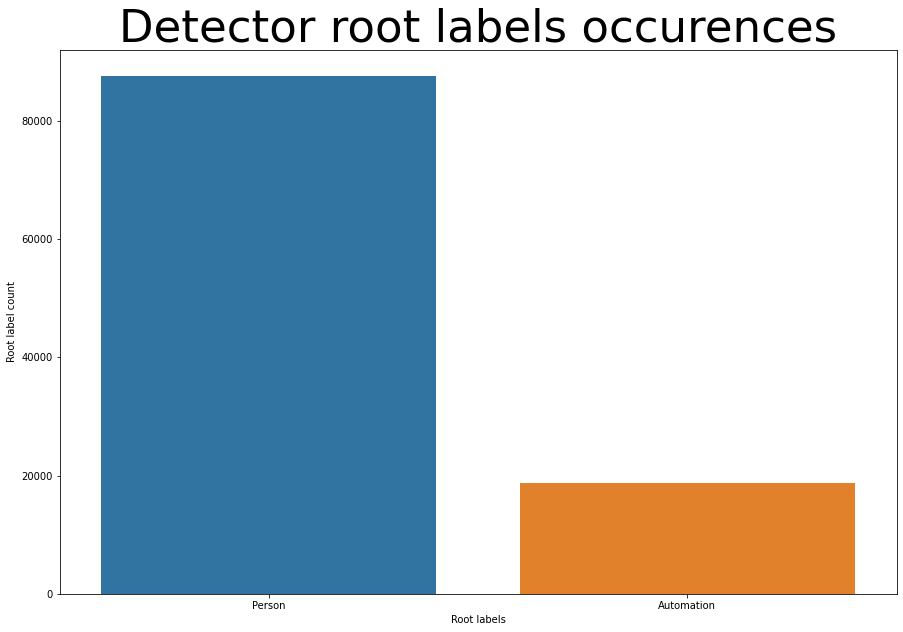

In [17]:
plt.figure(figsize =(15,10))
plt.title('Detector root labels occurences', fontsize=45)
plt.rc('font', size=32)
plt.rc('axes', titlesize=32)
sns.countplot(df_detector)
plt.ylabel('Root label count')
plt.xlabel('Root labels');

## Split each entry when it meets the character '; ' and stack it.

# Function
- Drop the null values in the df['Function'] by creating a new variable df_function

In [18]:
df_function = df['Function'].str.split('; ', expand =True).stack().reset_index(
    drop=True)

In [19]:
df_function.head()

0        Departure
1         Approach
2          Enroute
3     Pilot Flying
4    First Officer
dtype: object

## replace the spaces between a forward slash (' / ') to meat the same writing as you'd find in the PDF file

In [20]:
df_function = df_function.apply(lambda x:x.replace(' / ', '/'))

In [21]:
df_function.head()

0        Departure
1         Approach
2          Enroute
3     Pilot Flying
4    First Officer
dtype: object

## Creating a dictionary with an emty list of the different macrofeatures

In [22]:
function = {'Flight Crew' :[],
            'Air Traffic Control' : [],
            'Maintenance' :[],
            'Flight Attendant' :[],
            'Dispatch': [],
            'Ground Personnel':[],
            'other' : [],
            'trainee':[],
            'else': []} # I add other to see if I have some 
                          # other values than 'Automation' and
                          # 'Person' in my Serrie

In [23]:
flight_crew_unique = ['Captain', 'Check Pilot','First Officer',
                     'Flight Engineer/Second Officer','Instructor',
                     'Pilot Flying','Pilot Not Flying','Relief Pilot',
                     'Single Pilot']

air_traffic_control_unique = ['Approach','Coordinator','Departure',
                             'Enroute','Flight Data/Clearance Delivery',
                             'Flight Service','Ground','Handoff/Assist',
                             'Instructor','Trainee','Local','Oceanic',
                             'Supervisor/CIC', 'Traffic Management']

maintenance_unique = ['Inspector', 'Instructor','Lead Technician',
              'Parts/Stores Personnel','Quality Assurance/Audit',
              'Technician'] #you don't know which 
                            #trainee we talk about

flight_attendant_unique =['Flight Attendant In Charge',
                          'Flight Attendant (On Duty)',
                          'Off Duty']

dispatch_unique = 'Dispatcher'
trainee_unique ='Trainee'

ground_personnel_unique = ['Airport Personnel','FBO Personnel',
                   'Gate Agent/CSR','Ramp', 'Vehicle Driver']
other_unique = ['Observer', 'Passenger', 'Other', 'Other/Unknown']

Else = ['Safety Pilot','skydiver','Unicom Operations','Safety Manager','Safety Analyst','SAFETY MANAGER','DPE','Safety Analyst','SMS Analyst',
 'Safety Ananlyst','Operations Manager','Safety Officer','Drone Operator','Jet bridge Operator','With DPE','Local Civilian',
 'student pilot & instr','Company CEO','Safety Analyst','Safety Analyst','CFII was present','Solo Student','Student','Student',
 'Lineman','FSDO POI','Dual instruction flight','Commercial student','Instrument Student','PIC','DPE','Supervisor of Flying',
 'observer','Safety Analyst','Student Pilot','Maintenance Manager','Line Check Airman/Captain','Safety Analyst','Unknown',
 'ARMY H-60 CREW','Safety Analyst','Load Ccontroller','ATC','Load Planner','Medical Crew','Load Planner','Load Planner',
 'Manager Saftey','Ground Vehicle Passenger','CHIEF INSPECTOR','Maintenance Controller','Maintenance Controller','Manager',
 'Maintenance Controller','Maintenance Manager','Maintenance Controller','Maintence Controller','Maintenance Manager','Maintenance Controller',
 'Deadheading Pilot','Maintenance Controller','Maintenance Control','Retired Controller','Ground Crew','Maint Control','Safety Rep',
 'Maint Ctlr','Maint Controller','Maint Control','Chief Pilot','Builder','Maint Ctlr','Maint Ctlr','Maint Ctlr','Maint Controller',
 'Director of Maint','Maint Ctlr','Maint Ctlr','Maint Controller','Inspection','Maint Supvr','MAINT. CONTROL','Maint Ctlr','Maint Ctlr',
 'Maint Controller','MAINT CONTROLLER','Maint Controller','MX CONTROLLER','MX MANAGER','Maint Controller','M/X CONTRLLR',
 'Maint Controller','Maint Controller','Maint Controller','Maint Controller','Maint Planner','MX CNTRLLR','M/X CNTROLLER','Repairman',
 'Maint Controller','Maintenance Controller','Mechanic Helper','Director of Maintenance','Pilot','Maint Controller','Maint Ctlr',
 'MANAGER MAINT CONTROL','Ramp Controller','Quality Control','compliance director','Quality Manager','Ctlr','Flight Crew','Arpt Lineman',
 'Parts Room','Deadheading Capt','Cheif Flight Instructor','Maint Controller','Owner FBO','Tech Engineer','Maint Ctl','Maint Control',
 'Maint Controller','Maint Control','Dead Heading Crew Member','Maint Control','Deadhead','Maint Controller','Maint Controller',
 'Safety Personnel','Aviation Director','UAV Operator','Other Crewmember','Dead Head','Load Planner','CIC','Traffic Watch','Tow Operator',
 'Banner Tow','CIC','In Flt Svc','Plt Examiner','Fueler','Maint Controller','Maint Ctlr','Maint Ctlr','Director Of Operations',
 'Maint Ctlr','Parts Planner','Acft Washer','Fueler','Maint Planner','Systems Engineer','Maint Ctlr','Stock Clerk','Lead Inspector',
 'Certificate Holder','Maint Ctlr','Check Airman','Director Of Maint','Cabin Cleaner','Air Carrier Inspector','Air Carrier Inspector',
 'Safety Officer','Attending Convention','Systems Engr','CSR','Load Planner','Cabin Deadhead','Deadheading Plt','Baggage Handler',
 'Deadheading','Safety Pilot','DESIGNATED PILOT EXAMINER','sales','Air Carrier Inspector','Safety Plt','Flight Safety Manager',
 'Maint Ctlr','Maint Ctlr','Maint Planner','Maint Controller','Maint Controller','Parts Coordinator','Assistant Chief Pilot','Cleaner',
 'Owner','Owner','Maintenance Director','Maint Ctl','Owner','Stores Clerk','Maint Ctlr','Manager','Air Carrier Inspector','Auditor',
 'Air Carrier Inspector','Manager','Maint Coordinator','Stores Supervisor','Maint Controller','Owner/Pilot','Maint Ctlr','Engineering Manager',
 'Maint Ctlr','Maint Ctlr','Air Carrier Inspector','Maint Ctlr','Safety Plt','Maint Ctlr','MAINT CTLR','MAINT CTLR','ACFT OWNER','MAINT CTLR',
 'MANAGER','Shop Supervisor','Owner','Maint Ctlr','Maint Ctlr','Ramp Cleaner','MAINT CTLR','Maint Planner','Maint Ctlr','Maintenance Controller',
 'Quality Control Inspector','Maintenance Controller','Maintenance Controller','Maint Ctlr','Lead Inspector','Maint Ctlr','Lead Inspector',
 'Maint Ctlr','Crew Chief','Acft Cleaner','Maint Ctlr','Stock Clerk','Wing Walker','Apprentice','Maint Ctlr','Acft Cleaner','Maint Manager',
 'Shop Technician','Shop Technician','MAINT CTLR','Shop Technician','Maint Manager','MAINT CONTROL','Owner','Quality Assurance',
 'Safety Observer','Instructor #1','Reserve Plt','ARPT MX','Safety Pilot','Radar Associate','Engineer','Designated Pilot Examiner',
 'SAFETY PILOT','Second In Command','IRO','Flt Engineer','Equipment Svc','Check Airman','FA #2','Plt Examiner','Jumpseater Plt','Acft Owner',
 'ASSISTANT CTLR','Air Carrier Inspector','Radar Assistant','Air Carrier Inspector','Associate Radar','Reserve Plt','JUMPSEATER PLT',
 'Safety Plt','DEAD HEADING PLT','FA','PRO-PLT','FLIGHT DUTY MGR','Radar Associate','OBSERVING PLT','Aviation Analyst','Maint Records Clerk',
 'Store Clerk','Mx Ctlr','Mx Ctlr','Mx Ctlr','Union Representative','Union Rep','Ctlr Rep','Mx Ctlr','UNION REP','Apprentice',
 'Acft Clearner','MX Coordinator','Store Clerk','Union Representative','Safety Plt','Ex Owner','Records Clerk','Maint Ctlr','Load Planner',
 'Mx Ctlr','Mx Ctlr','Mx Ctlr','Repairman (Welder)','Mx Ctlr','Maint Mgr','Maint Mgr','Store Clerk','Mgr','Owner','EMS','Maint Ctlr',
 'Maint Ctlr','Mgr','Crew Scheduler','ACFT CLEANER','Shop Manager','MAINT CTLR','Acft Cleaner','FAA EXAMINER','MAINT CTLR','Systems Engineer',
 'Flt Safety Officer','CHECK RIDE EXAMINER','CHIEF PLT','CHIEF PURSER','MAINT CTLR','FBO OWNER','OWNER','STORE CLERK','Maint Ctlr',
 'Main Ctlr','MAINT MGR','Air Carrier Inspector','FA','ARPT COORDINATOR','MX COORDINATOR','MX CTLR','MX CTLR','MX CTLR','MAINT CTLR',
 'MX CTLR','MX CTLR','FAA INSPECTOR','MX CTLR','POWERPLANT ENGINEER','UNION REP','Director of Maint','Director of Maint','QUALITY CTL INSPECTOR',
 'MX CTLR','ACFT CLEANER','FLT SCHOOL OWNER','MAINT CTLR','MX CTLR','MX CTLR','MX COORDINATOR','SUPERVISOR','Parts Washer','Stock Clerk',
 'Mx director','Maint. Ctlr','Maint Ctlr','Maint Coord','Shop Planner','Manager','RADAR ASSOCIATE','Examine','Safety Plt','RADAR ASSOCIATE',
 'FA #1','FAA INSPECTOR','JUMP SEATER','FA #4','SAFETY PLT','PARAMEDICS','SAFETY PLT','EXAMINES','CTLR IN CHARGE','CTLR IN CHARGE','RAMP CTLR',
 'JUMPSEATER','FUELER','COMP SAFETY REP','RAMP GUIDANCE CTLR','OWNER','JUMP SEATER','Maint Ctlr']

In [24]:
# Looping through each lists of unique values and add the corresponding string to the right list of macrofeatures in the dictionary

In [25]:
df['Function'].head()

ACN
986560            Departure; Approach
988077                        Enroute
988094    Pilot Flying; First Officer
988431                         Ground
989412                   Single Pilot
Name: Function, dtype: object

In [26]:
for title in df_function:
    if title in air_traffic_control_unique:
        function['Air Traffic Control'].append(title)
    elif title in flight_crew_unique:
        function['Flight Crew'].append(title)
    elif title in maintenance_unique:
        function['Maintenance'].append(title)
    elif title in flight_attendant_unique:
        function['Flight Attendant'].append(title)
    elif title in dispatch_unique:
        function['Dispatch'].append(title)
    elif title in ground_personnel_unique:
        function['Ground Personnel'].append(title)
    elif title in other_unique:
        function['other'].append(title)
    elif title in trainee_unique:
        function['trainee'].append(title)
    else:
        function['else'].append(title)

In [27]:
for title in function['Flight Crew']:
    for item in flight_crew_unique:
        if title == item:
            df_function = df_function.replace(to_replace = title, value = 'flight_crew')

In [28]:
for title in function['Air Traffic Control']:
    for item in air_traffic_control_unique:
        if title == item:
            df_function = df_function.replace(to_replace = title, value = 'air_trafic_control')

In [29]:
for title in function['Maintenance']:
    for item in maintenance_unique:
        if title == item:
            df_function = df_function.replace(to_replace = title, value = 'maintenance')

In [30]:
for title in function['Flight Attendant']:
    for item in flight_attendant_unique:
        if item == title:
            df_function = df_function.replace(to_replace = title, value = 'flight_attendant')

In [31]:
for title in function['Dispatch']:
    for item in dispatch_unique:
        if item == title:
            df_function = df_function.replace(to_replace = title, value = 'dispatch')

In [32]:
for title in function['Ground Personnel']:
    for item in ground_personnel_unique:
        if item == title:
            df_function = df_function.replace(to_replace = title, value = 'ground_personnel')

In [33]:
for title in function['other']:
    for item in other_unique:
        if item == title:
            df_function = df_function.replace(to_replace = title, value = 'other')

In [34]:
for title in function['trainee']:
    for item in trainee_unique:
        if item == title:
            df_function = df_function.replace(to_replace = title, value = 'trainee')

In [35]:
for title in function['else']:
    for item in Else:
        if item == title:
            df_function = df_function.replace(to_replace = title, value = 'Else')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'Root labels')

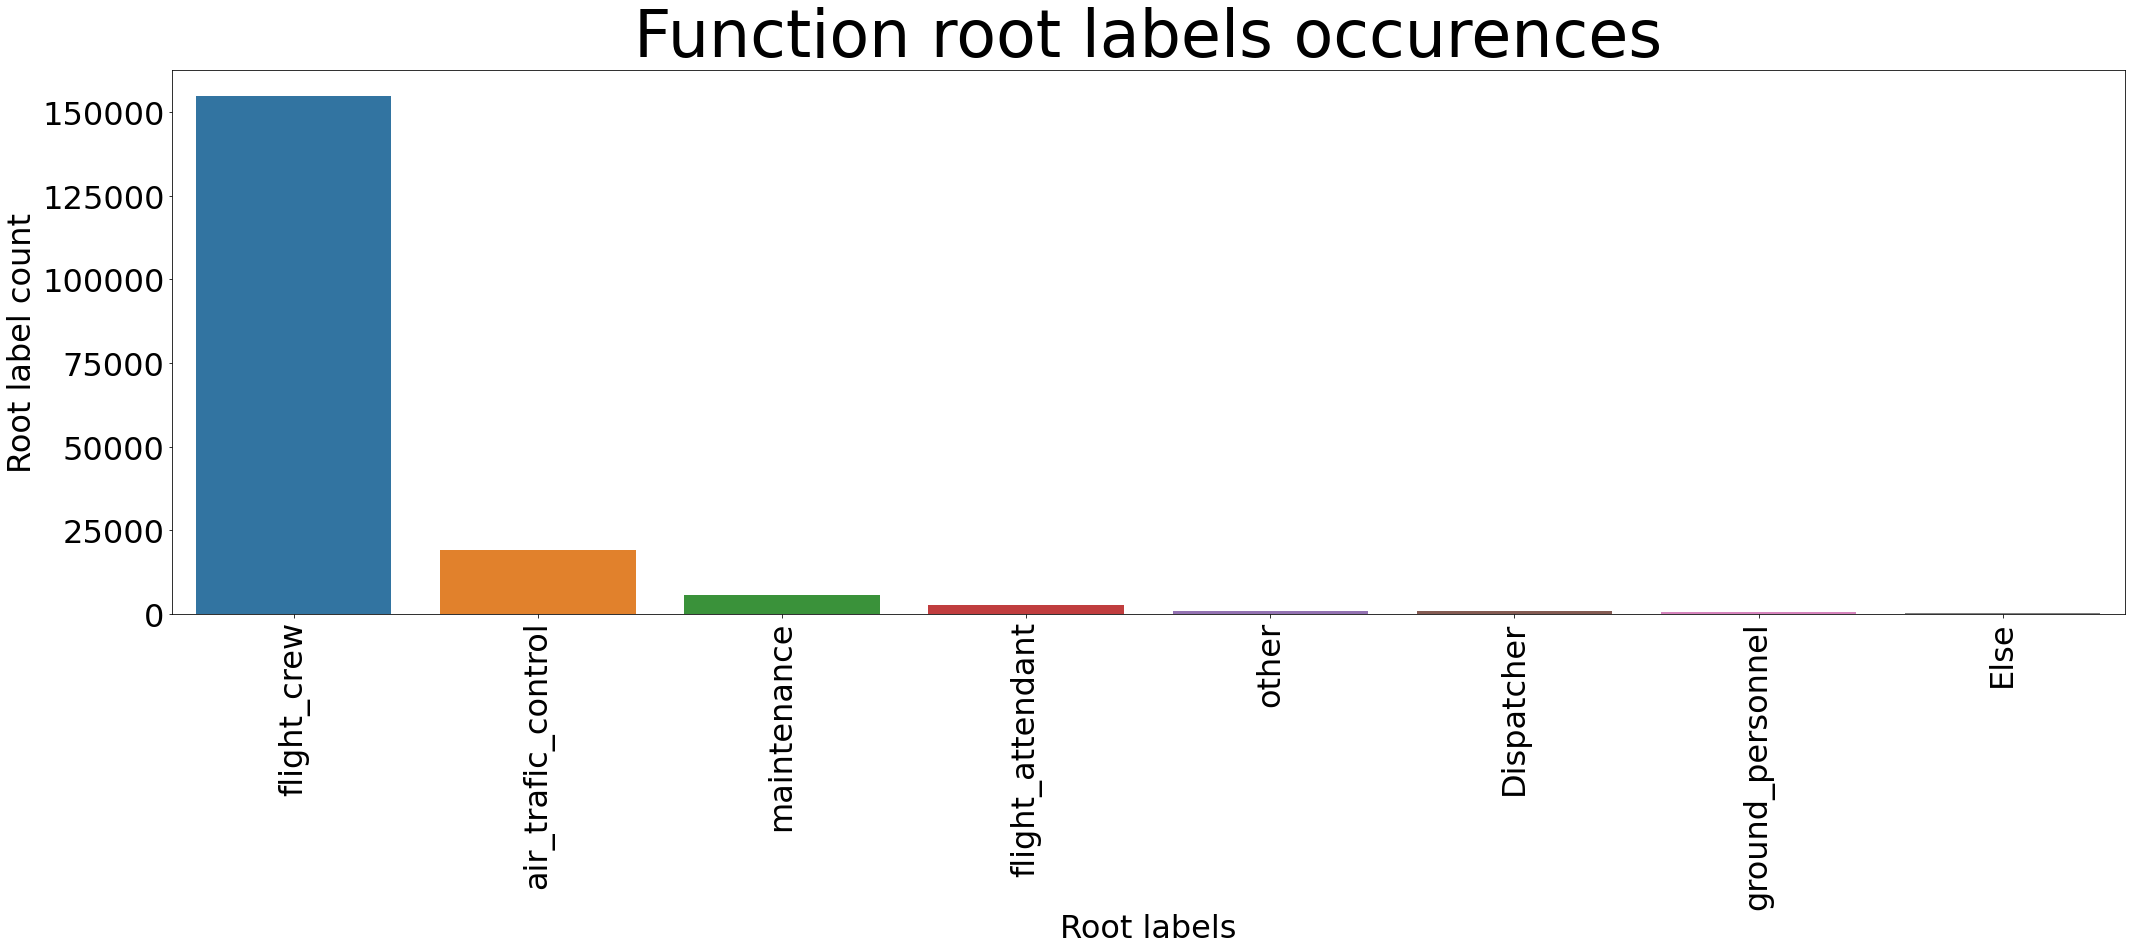

In [36]:
plt.figure(figsize =(35,10))
plt.title('Function root labels occurences', fontsize=65)
plt.rc('font', size=32)
plt.rc('axes', titlesize=32)
plt.xticks(rotation=90)
sns.countplot(df_function, order = df_function.value_counts().index)
plt.ylabel('Root label count')
plt.xlabel('Root labels')

# Experience

## Split each entry when it meets the character '; ' and stack it.

In [37]:
df_experience= df['Experience'].str.split(
    '; ', expand=True).stack().reset_index(drop =True)

In [38]:
df_experience = df_experience.dropna()

In [39]:
df_experience.isna().sum()

0

## Create a dictionary with the different macrofeature

In [40]:
experience  =  {'Flight Crew' : [],
                 'Air Traffic Control': [],
                 'Maintenance': [],
                 'Flight Attendant': [],
                 'Dispatch':[],
                 'else': []}

In [41]:
for entry in df_experience:
    if 'Flight Crew' in entry:
        experience['Flight Crew'].append(entry)
    elif 'Air Traffic Control' in entry:
        experience['Air Traffic Control'].append(entry)
    elif 'Maintenance' in entry:
        experience['Maintenance'].append(entry)
    elif 'Flight Attendant' in entry:
        experience['Flight Attendant'].append(entry)
    elif 'Dispatch' in entry:
        experience['Dispatch'].append(entry)
    else:
        experience['else'].append(entry) # interesting way to know
                                            # if you have additional
                                            # features that are not
                                            # mentionned in the PDF

In [42]:
for entry in df_experience:
    if 'Flight Crew' in entry:
        df_experience = df_experience.replace(to_replace = entry, value ='Flight Crew')
    elif 'Air Traffic Control' in entry:
        df_experience = df_experience.replace(to_replace = entry, value ='Air Traffic Control')
    elif 'Maintenance' in entry:
        df_experience = df_experience.replace(to_replace = entry, value ='Maintenance')
    elif 'Flight Attendant' in entry:
        df_experience = df_experience.replace(to_replace = entry, value ='Flight Attendant')
    elif 'Dispatch' in entry:
        df_experience = df_experience.replace(to_replace = entry, value ='Dispatch')
    else:
        df_experience = df_experience.replace(to_replace = entry, value ='else')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'Root labels')

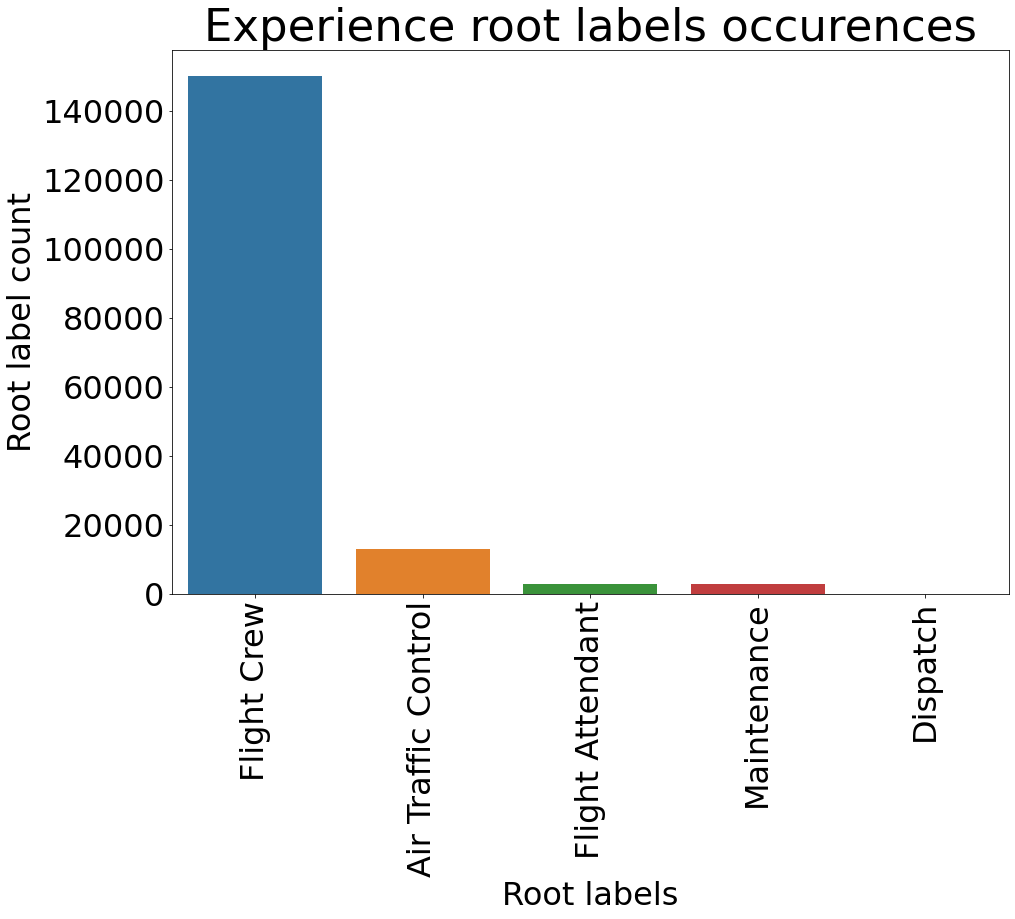

In [43]:
plt.figure(figsize = (15,10))
plt.title('Experience root labels occurences', fontsize=45)
plt.rc('font', size=32)
plt.rc('axes', titlesize=32)
plt.xticks(rotation =90)
sns.countplot(df_experience, order = df_experience.value_counts().index)
plt.ylabel('Root label count')
plt.xlabel('Root labels')

# Qualification

## Split each entry when it meets the character '; ' and stack it

In [44]:
df_qualification = df['Qualification'].str.split('; ', expand=True).stack().reset_index(
drop=True)

In [45]:
df_qualification = df_qualification.dropna()

In [46]:
df_qualification.isna().sum()

0

## Create a dictionary with the different macrofeature

In [47]:
qualification = {'Flight Crew' : [],
                 'Air Traffic Control': [],
                 'Maintenance': [],
                 'Flight Attendant': [],
                 'Dispatch':[],
                 'Other':[],
                 'else': []}

In [48]:
for entry in df_qualification:
    if 'Flight Crew' in entry:
        qualification['Flight Crew'].append(entry)
    elif 'Air Traffic Control' in entry:
        qualification['Air Traffic Control'].append(entry)
    elif 'Maintenance' in entry:
        qualification['Maintenance'].append(entry)
    elif 'Flight Attendant' in entry:
        qualification['Flight Attendant'].append(entry)
    elif 'Dispatch' in entry:
        qualification['Dispatch'].append(entry)
    elif 'Other' in entry:
        qualification['Other'].append(entry)
    else:
        qualification['else'].append(entry) # interesting way to know
                                            # if you have additional
                                            # features that are not
                                            # mentionned in the 

In [49]:
for entry in df_qualification:
    if 'Flight Crew' in entry:
        df_qualification = df_qualification.replace(to_replace = entry, value ='Flight Crew')
    elif 'Air Traffic Control' in entry:
        df_qualification = df_qualification.replace(to_replace = entry, value ='Air Traffic Control')
    elif 'Maintenance' in entry:
        df_qualification = df_qualification.replace(to_replace = entry, value ='Maintenance')
    elif 'Flight Attendant' in entry:
        df_qualification = df_qualification.replace(to_replace = entry, value ='Flight Attendant')
    elif 'Dispatch' in entry:
        df_qualification = df_qualification.replace(to_replace = entry, value ='Dispatch')
    elif 'Other' in entry:
        df_qualification = df_qualification.replace(to_replace = entry, value ='Other')
    else:
        df_qualification = df_qualification.replace(to_replace = entry, value ='Else') # interesting way to know
                                            # if you have additional
                                            # features that are not
                                            # mentionned in the PDF

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'Root labels')

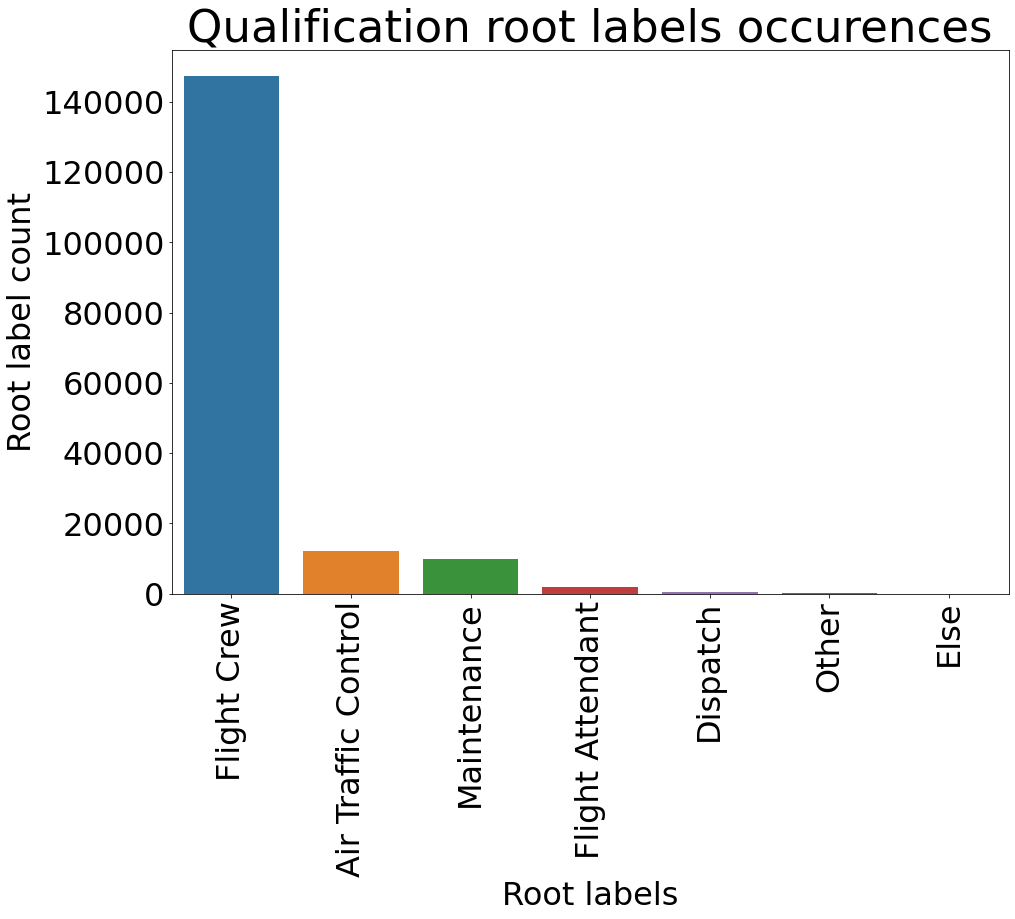

In [50]:
plt.figure(figsize=(15,10))
plt.title('Qualification root labels occurences', fontsize=45)
plt.rc('font', size=32)
plt.rc('axes', titlesize=32)
plt.xticks(rotation =90)
sns.countplot(df_qualification, order = df_qualification.value_counts().index)
plt.ylabel('Root label count')
plt.xlabel('Root labels')